In [20]:
#!python -m pip install --upgrade pip
#!pip install opencv-python
print(cv2.__version__)
print(cv2.__path__)

4.3.0
['C:\\Users\\avish\\anaconda3\\lib\\site-packages\\cv2']


### Face Detection in OPENCV

In [24]:
import cv2

# Create a CascadeClassifier Object
face_cascade =cv2.CascadeClassifier("C:\\Users\\avish\\anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml")

# Read the Image
img = cv2.imread("./images/face1.jpg",1)
# Read the Image as GrayScale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Search
faces = face_cascade.detectMultiScale(gray_img, scaleFactor = 1.05, minNeighbors=5)
print(type(faces))
print(faces)
for x, y, w, h in faces:
    img = cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 3)
resized = cv2.resize(img, (int(img.shape[1]),int(img.shape[0])))
cv2.imshow("Gray",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()



<class 'numpy.ndarray'>
[[ 74  36 114 114]]



#### EDGE DETECTION

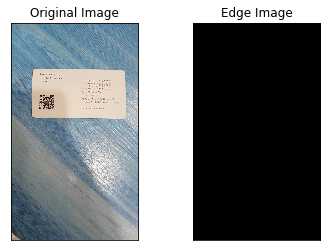

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/img01.jpg',1)
edges = cv2.Canny(img,1000,20)
 
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [17]:
# import the necessary packages
import numpy as np
import argparse
import glob
import cv2
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged
image = cv2.imread('./images/img11.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred, 10, 200)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)
# show the images
#cv2.imshow("Original", image)
cv2.imshow("Edges", np.hstack([wide,tight,auto]))
cv2.waitKey(0)

-1

usage: ipykernel_launcher.py [-h] -i IMAGES
ipykernel_launcher.py: error: the following arguments are required: -i/--images


SystemExit: 2

In [19]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import random as rng
rng.seed(12345)
def thresh_callback(val):
    threshold = val
    
    canny_output = cv.Canny(src_gray, threshold, threshold * 2)
    
    
    contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    
    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)
    for i, c in enumerate(contours):
        contours_poly[i] = cv.approxPolyDP(c, 3, True)
        boundRect[i] = cv.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])
    
    
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    
    
    for i in range(len(contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(drawing, contours_poly, i, color)
        cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
          (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
        cv.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)
    
    
    cv.imshow('Contours', drawing)
    
src = cv.imread('./images/img01.jpg')
if src is None:
    print('Could not open or find the image:', args.input)
    exit(0)
# Convert image to gray and blur it
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (3,3))
source_window = 'Source'
cv.namedWindow(source_window)
cv.imshow(source_window, src)
max_thresh = 255
thresh = 100 # initial threshold
cv.createTrackbar('Canny thresh:', source_window, thresh, max_thresh, thresh_callback)
thresh_callback(thresh)
cv.waitKey()


-1

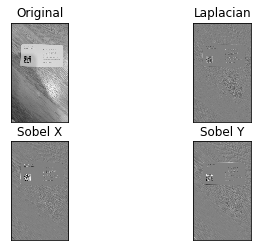

In [70]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
#img0 = cv2.imread('SanFrancisco.jpg',)
img0 = cv2.imread('./images/img01.jpg',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

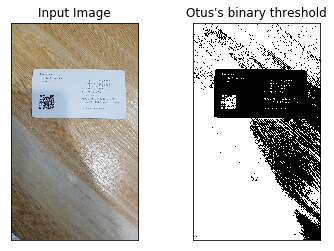

In [69]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./images/img01.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, 'gray')
plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
plt.show()

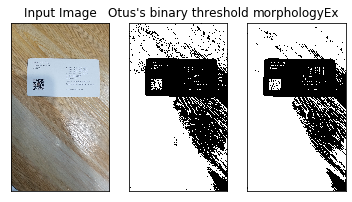

In [71]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./images/img01.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

plt.subplot(131),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh, 'gray')
plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closing, 'gray')
plt.title("morphologyEx"), plt.xticks([]), plt.yticks([])
plt.show()

In [79]:
import cv2
import numpy as np
# Read image
im = cv2.imread("./images/img01.jpg")
# Select ROI
r = cv2.selectROI(im)
# Crop image
imCrop = im[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
# Display cropped image
cv2.imshow("Image", imCrop)
cv2.waitKey(0)


-1